What is JAX?
============

JAX is a machine learning library by google, offering among other features:
1. numpy-style syntax
2. automatic vectorization
3. just-in-time (JIT) compilation to fast CUDA kernels
4. automatic differentiation

1) numpy-style syntax
---------------------
By importing jax.numpy we get access to (almost) all the functionality we are used from regular numpy

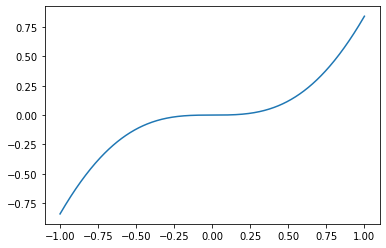

In [1]:
import numpy as np
import jax.numpy as jnp
import jax
import matplotlib.pyplot as plt
import time
np.random.seed(1234)

# Standard functions
x = jnp.linspace(-1.0, 1.0, 500)
y = jnp.sin(x) * x**2

# Linear algebra
A = jnp.eye(20)
jnp.linalg.eigh(A)

# Compatibility with maptlotlib
plt.figure()
plt.plot(x, y)

2) Vectorization using vmap
---------------------------

We can automatically vectorize (almost) any function using **jax.vmap**

Shapes of non-vectorized version: y_poly = f(x, coeffs)
x.shape=(500,)
coeffs.shape=(11,)
y_poly.shape=(500,)


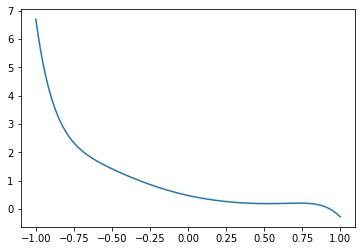

In [2]:
def evaluate_polynomial(x, coeffs):
    y = jnp.zeros_like(x)
    for k, c in enumerate(coeffs):
        y += c * x**k
    return y

# Get a random polynomial of degree 3
polynomial_degree = 10
coeffs = np.random.normal(size=[polynomial_degree + 1])
y_poly = evaluate_polynomial(x, coeffs)
print("Shapes of non-vectorized version: y_poly = f(x, coeffs)")
print(f"x.shape = {x.shape}")
print(f"coeffs.shape = {coeffs.shape}")
print(f"y.shape = {y.shape}")
plt.figure()
plt.plot(x, y_poly)

Incompatible shapes
jax.vmap added a vectorized dimension as 0-th dimension to the 2nd argument (coeffs) and the output:
Shapes of vectorized version: y_poly = f(x, coeffs)
x.shape=(500,)
coeffs.shape=(3, 11)
y_poly.shape=(3, 500)


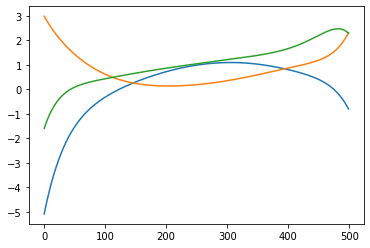

In [3]:
nr_of_polynomials = 3
coeffs = np.random.normal(size=[nr_of_polynomials, polynomial_degree + 1])
# This does not work, because we have not written our function to accept vectorized arguments
try:
    y_poly = evaluate_polynomial(x, coeffs)
except TypeError:
    print("Incompatible shapes")

# But we can "automagically" vectorize our function using JAX
evaluate_polynomial_vectorized = jax.vmap(evaluate_polynomial, in_axes=(None, 0), out_axes=0)
y_poly = evaluate_polynomial_vectorized(x, coeffs)
print("jax.vmap added a vectorized dimension as 0-th dimension to the 2nd argument (coeffs) and the output:")
print("Shapes of vectorized version: y_poly = f(x, coeffs)")
print(f"x.shape = {x.shape}")
print(f"coeffs.shape = {coeffs.shape}")
print(f"y_poly.shape = {y_poly.shape}")
plt.figure()
plt.plot(y_poly.T)

3) JIT-compilation
------------------

Jax can JIT-compile our code to very fast CUDA kernels to run on GPUs or other accelerator hardware.

In [4]:
evaluate_poly_compiled = jax.jit(evaluate_polynomial_vectorized)
t0 = time.time()
evaluate_polynomial_vectorized(x, coeffs)
t1 = time.time()
evaluate_poly_compiled(x, coeffs)
t2 = time.time()
evaluate_poly_compiled(x, coeffs)
t3 = time.time()

print(f"Non-compiled version                      : {t1 - t0: .4f} sec")
print(f"First call to JITed version (compile time): {t2 - t1: .4f} sec")
print(f"Subsequent calls to JITed version         : {t3 - t2: .4f} sec")

Non-compiled version                      :  0.0283 sec
First call to JITed version (compile time):  0.1777 sec
Subsequent calls to JITed version         :  0.0002 sec


4) Automatic differentiation
----------------------------

JAX can automatically compute gradients of functions using backpropagation.

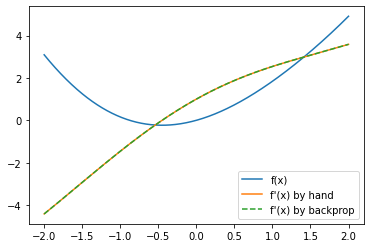

In [5]:
def my_func(x):
    return jnp.sin(x) + x**2

def derivative_by_hand(x):
    return jnp.cos(x) + 2*x

derivative_by_backprop = jax.grad(my_func, argnums=0)
derivative_by_backprop = jax.vmap(derivative_by_backprop)

x = jnp.linspace(-2, 2, 500)
plt.plot(x, my_func(x), label="f(x)")
plt.plot(x, derivative_by_hand(x), label="f'(x) by hand")
plt.plot(x, derivative_by_backprop(x), label="f'(x) by backprop", ls='--')
plt.legend()


